In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./letterto shareholders2/*.txt")
    return files
textfile=textfile()
textfile

['./letterto shareholders2/2016華夏致股東.txt',
 './letterto shareholders2/2017華夏致股東.txt',
 './letterto shareholders2/2014士紙致股東.txt',
 './letterto shareholders2/2015士紙致股東.txt',
 './letterto shareholders2/2015強新致股東.txt',
 './letterto shareholders2/2014強新致股東.txt',
 './letterto shareholders2/2015橘子致股東.txt',
 './letterto shareholders2/2014橘子致股東.txt',
 './letterto shareholders2/2015東元致股東.txt',
 './letterto shareholders2/2014東元致股東.txt',
 './letterto shareholders2/2013東元致股東.txt',
 './letterto shareholders2/2013士紙致股東.txt',
 './letterto shareholders2/2013強新致股東.txt',
 './letterto shareholders2/2013橘子致股東.txt',
 './letterto shareholders2/2016東元致股東.txt',
 './letterto shareholders2/2017東元致股東.txt',
 './letterto shareholders2/2016強新致股東.txt',
 './letterto shareholders2/2017強新致股東.txt',
 './letterto shareholders2/2016橘子致股東.txt',
 './letterto shareholders2/2017橘子致股東.txt',
 './letterto shareholders2/2015華夏致股東.txt',
 './letterto shareholders2/2014華夏致股東.txt',
 './letterto shareholders2/2017士紙致股東.txt',
 './lettert

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zz/bqrx4v8s4cq4vszqlfzpp6_40000gn/T/jieba.cache
Loading model cost 0.648 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '',
 '',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['壹 致股 東報 告書 諸位 股東 女士 先生 感謝 各位 股東長 期 支持 謹將營 運狀況 報告 如下 一 一 五 年度 營業 報告 一 五年 合 併 銷貨淨額 新 台幣 一佰 四十一 億六仟 萬元 較 去 同期 增加 三億二仟 萬元 預算達 成率 合 併 營業 利益 新 台幣 十 八億七仟 四佰萬元 較 去年同期 增加 九 億五仟 八佰萬元 合 併 稅後淨 利為 新台幣 十五 億四仟 三佰萬元 較 去年同期 增加 七 億三仟 一佰萬元 預算達 成率 合 併 稅後淨 利歸屬 業主為 新 台幣 十四 億四仟 三佰萬 較 去年同期 增加 六 億七仟 六佰萬元 回顧 一 五 年度 營運 油價 自 年初 翻 漲後全 年度 維 持平 穩 上半年 石 化 原料 及產品 需求 態勢 強勁 與 價格 穩步 上 漲 第三季 初 市場 受 印度 雨季 及 回教 齋戒 月影 響致 買家 觀望 後 因 印度 北部 乾旱 導致 其 國內 減 産 另大陸 召開 計劃性 縮減 煤炭 產量 及 淘汰 落後電 石法 產能 等 影響 產業 結構 性 轉佳致 行情 上揚 第四季 市場 因印 度換 鈔 問題 及 大陸漲 多 回跌 致 年底 行情 稍 挫 但 幅度 不 大 原料 方 面 上半年 美國及 中東 貨源 充沛 抑制 價格 上揚 現貨 乙烯 行情 因供 需變化 上下 震盪 中油 合約 價格 相對 優惠 乙烯 成本 控制 尚稱 合宜 下 半 則因 東南亞及 大陸 新產能 未 如 預期 開出 而 供 應維持 緊俏 原料 因 全球 燒鹼 行情 回溫 供應 增加 而 使 價格維持 低檔 乙烯 價格續 呈 震 盪走勢 中油 合約 相對持 穩 合宜 秉持 上下 整合 精神 積極 規劃 更新 生產設 備強 化生 產 效能 配合 加工品 等 系列 之產 銷極 大化 目標 上下游 產銷 順暢 成本 控制 等 合宜 運作 並持續 拓展 外銷 市場 年產 萬公噸 扣除 供 自 製 粉 用量 後 外銷 售 萬公噸 較 一 四年 減少 較 預算 減少 粉年產 萬公噸 扣除 供 自 製 下游 加工品 用量 後 對外 銷售 萬公噸 較 一 四年 增加 較 預算 增加 在 化學產品 方面 因電子業 景氣 復 甦 及 鹼氯 供需 均衡 但 鹽酸因 受次級 酸 競價 影響 價格 下跌 化學產品 年產 萬 公噸 以 濃度 計算 銷售

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  3521


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (25, 3521)


<25x3521 sparse matrix of type '<class 'numpy.float64'>'
	with 8482 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
上下 0.0824732895615244 0 38
上半年 0.0643797896041265 0 42
上揚 0.0643797896041265 0 47
下游 0.06035593233814986 0 59
中油 0.11244571287900618 0 139
乙烯 0.128759579208253 0 182
供應 0.06035593233814986 0 354
供需 0.06035593233814986 0 361
價格 0.08092296735119782 0 421
億四仟 0.0824732895615244 0 443
則因 0.09305730854340202 0 605
加工品 0.09656968440618975 0 650
化學產品 0.0643797896041265 0 676
化生 0.06913900261487443 0 680
印度 0.0643797896041265 0 723
原料 0.128759579208253 0 731
去年同期 0.0694294344700929 0 738
可望 0.06035593233814986 0 805
台幣 0.05143639832591852 0 814
合宜 0.12370993434228661 0 840
合約 0.09305730854340202 0 844
四年 0.2074170078446233 0 919
增加 0.12185633079586843 0 1044
市場 0.05425439345789786 0 1350
年度 0.08138159018684679 0 1389
年產 0.128759579208253 0 1394
成率 0.0643797896041265 0 1541
扣除 0.06035593233814986 0 1588
控制 0.12071186467629973 0 1644
效能 0.0824732895615244 0 1750
更新 0.05687030862860621 0 1876
有效 0.05104550265747652 0 1907
機制 0.06913900261487443 0 2025
油價 0.0643797896041265 0 21

積體 0.061639703935107266 4 2523
經濟 0.1794008756700051 4 2643
經濟景氣 0.05167379249945242 4 2646
經濟表現 0.061639703935107266 4 2649
綜觀 0.05602719367271395 4 2668
線材 0.12327940787021453 4 2688
美國 0.1263460610521034 4 2710
聯準 0.06955009286169192 4 2746
聲譽 0.05602719367271395 4 2749
萬元 0.10378171667145403 4 2827
衰退 0.12061924745863399 4 2884
貨幣 0.05167379249945242 4 2977
資訊 0.05167379249945242 4 3005
趨緩 0.1120543873454279 4 3043
車廠 0.061639703935107266 4 3064
近八年 0.06955009286169192 4 3102
近期 0.05602719367271395 4 3104
逐步 0.0725828940413497 4 3113
遲滯 0.061639703935107266 4 3184
鋼及 0.05602719367271395 4 3241
鋼材 0.1120543873454279 4 3243
鋼鐵 0.05602719367271395 4 3244
鋼鐵產業 0.061639703935107266 4 3246
鋼鐵產能 0.061639703935107266 4 3247
鐵礦 0.13910018572338384 4 3252
雖持續 0.06955009286169192 4 3343
雖然 0.05602719367271395 4 3347
零叁 0.06955009286169192 4 3357
零壹 0.13910018572338384 4 3359
電子 0.05167379249945242 4 3369
電路 0.05602719367271395 4 3377
需求 0.09107419132678754 4 3383
需求面 0.13910018572338384 4 338

子公司 0.053405635096910375 8 1156
市場 0.056762891705843664 8 1350
年度 0.14190722926460916 8 1389
影響 0.08618891676517983 8 1464
成長 0.11798522965797863 8 1544
投資 0.08442459607716626 8 1602
持續 0.07374076853623664 8 1620
挑戰 0.07620402598251425 8 1625
控制 0.06314654045066843 8 1644
支出 0.10103466629425734 8 1705
收入 0.08618891676517983 8 1710
效率 0.10103466629425734 8 1747
方面 0.12263449569688648 8 1823
智慧 0.1347128883923431 8 1861
智能 0.10850355523162324 8 1862
本期 0.22101289157733953 8 1945
業主 0.07842982434089892 8 1983
權益 0.06314654045066843 8 2050
此外 0.056283064051444176 8 2077
母公司 0.056283064051444176 8 2085
治理 0.05949975595006048 8 2130
淨利 0.1347128883923431 8 2169
淨額 0.05080268398834283 8 2174
減少 0.09338248915151433 8 2188
減緩 0.15685964868179783 8 2197
營收 0.13264941617948997 8 2262
營業 0.1844793980439919 8 2266
物料 0.06314654045066843 8 2288
理念 0.07233570348774883 8 2338
發展 0.05381460416064666 8 2413
空調 0.18083925871937206 8 2533
節能 0.09471981067600266 8 2577
系統 0.05949975595006048 8 2599
經濟 0.05

惟面 0.072047071581983 12 1505
愈來 0.072047071581983 12 1507
應變 0.10705795704756497 12 1522
成本 0.07518875600962635 12 1535
成長將 0.06385268486321441 12 1545
打開 0.072047071581983 12 1585
拾伍 0.06385268486321441 12 1615
持續 0.10913747499454285 12 1620
推生 0.072047071581983 12 1658
提供 0.06843648191597135 12 1662
提升 0.07075794415013367 12 1665
擴張 0.05803867496054771 12 1696
改良 0.072047071581983 12 1727
政策 0.07167178324068771 12 1738
暫解 0.072047071581983 12 1866
未來面 0.05352897852378249 12 1934
柒仟 0.072047071581983 12 1966
柒佰貳 0.072047071581983 12 1970
榮景下 0.072047071581983 12 2008
機會 0.05352897852378249 12 2030
歐債 0.06385268486321441 12 2054
求及 0.072047071581983 12 2116
汽車 0.25541073945285764 12 2123
消費 0.07167178324068771 12 2158
消費力 0.072047071581983 12 2159
營環境 0.072047071581983 12 2270
環境 0.05759333509560953 12 2342
產品線 0.06385268486321441 12 2368
產能過 0.072047071581983 12 2377
相較 0.072047071581983 12 2456
知名度 0.05352897852378249 12 2471
確定 0.05803867496054771 12 2485
稅後淨 0.0654410607533231 12 2

----Document 16----
並衝擊 0.07128422238800129 16 114
中國 0.1354237247741377 16 127
中國大陸 0.09863305335749853 16 131
主義熱潮 0.07128422238800129 16 152
主要 0.06771186238706885 16 153
事業 0.06771186238706885 16 191
亮眼 0.05742414954763014 16 226
以長 0.07128422238800129 16 297
伍拾 0.17227244864289043 16 309
作為 0.0631765995191204 16 338
保護 0.0631765995191204 16 377
債務 0.0631765995191204 16 412
價格 0.06198901398775471 16 421
億玖佰零陸 0.07128422238800129 16 448
億陸仟 0.0631765995191204 16 450
光電 0.07128422238800129 16 472
刺激 0.14256844477600258 16 601
加約 0.0631765995191204 16 654
勢力 0.07128422238800129 16 672
升級 0.05742414954763014 16 706
原料 0.09863305335749853 16 731
參億零陸佰 0.07128422238800129 16 742
參拾 0.05296220270312939 16 743
反體制 0.07128422238800129 16 773
取代 0.05296220270312939 16 774
台幣 0.05253542094285531 16 814
各位 0.0599875750594898 16 826
各國 0.05296220270312939 16 828
合金 0.0631765995191204 16 848
吳玉堂 0.05296220270312939 16 864
國內外 0.05296220270312939 16 966
國家及 0.07128422238800129 16 974
國際景氣 0.06317

合作 0.05795240275190927 18 839
品牌 0.05512784555464899 18 871
商事 0.062421761554139595 18 884
商圈 0.0936326423312094 18 888
四大 0.062421761554139595 18 918
園區 0.07043251403756509 18 989
多元 0.08143307449615302 18 1069
天即 0.07043251403756509 18 1123
天堂 0.07849411048586567 18 1124
媒體 0.0685226144759128 18 1154
富錦街 0.14086502807513018 18 1199
實力 0.062421761554139595 18 1202
將延續 0.062421761554139595 18 1238
市場 0.09239322654428192 18 1350
延伸 0.0685226144759128 18 1425
引進 0.0567380422149275 18 1442
情境 0.062421761554139595 18 1494
成功 0.05254922686329661 18 1528
手遊 0.12484352310827919 18 1579
支付 0.21927280379175904 18 1702
故事 0.07043251403756509 18 1743
數位 0.10465881398115423 18 1765
文青 0.07043251403756509 18 1776
日前 0.07043251403756509 18 1833
日本 0.06107480587211476 18 1838
時代 0.062421761554139595 18 1850
智慧 0.07309093459725301 18 1861
月份 0.07043251403756509 18 1897
服務 0.07726987033587904 18 1913
服務據點 0.062421761554139595 18 1916
椰子 0.07043251403756509 18 1982
業群 0.062421761554139595 18 1991
樂利 0.1

供需 0.07312032336993783 21 361
俾利達 0.056368779580004205 21 388
停工 0.056368779580004205 21 396
價銷 0.056368779580004205 21 430
價難 0.11273755916000841 21 432
億一仟 0.0999151759985229 21 433
出現 0.056368779580004205 21 566
利持續 0.056368779580004205 21 588
加工 0.07312032336993783 21 649
加工品 0.07799516720192867 21 650
印度 0.07799516720192867 21 723
原料 0.19498791800482168 21 731
去年同期 0.08411273760800164 21 738
及鹼 0.056368779580004205 21 769
反映 0.056368779580004205 21 771
受產能過 0.056368779580004205 21 792
台幣 0.06231443924193685 21 814
合約價 0.056368779580004205 21 845
同步 0.09081755036341417 21 860
四佰萬元 0.09081755036341417 21 914
四十五 0.056368779580004205 21 917
增加 0.14762715059305045 21 1044
大幅提高 0.056368779580004205 21 1097
大跌 0.056368779580004205 21 1110
對外 0.06889754156681994 21 1279
岩油產量 0.056368779580004205 21 1322
市場 0.06572839885324416 21 1350
帶動下 0.056368779580004205 21 1365
幣九仟 0.056368779580004205 21 1368
年度 0.09859259827986623 21 1389
年產 0.11699275080289301 21 1394
廠產品 0.056368779580004205 21 

大產銷 0.05727521492951031 24 1105
天候 0.05727521492951031 24 1122
失衡 0.10152185700442695 24 1131
如此 0.05727521492951031 24 1143
安排 0.05727521492951031 24 1172
將接續 0.05727521492951031 24 1240
對外 0.07000544504877479 24 1279
幣九億一仟 0.05727521492951031 24 1369
平穩 0.05727521492951031 24 1377
年來 0.050760928502213476 24 1378
年度 0.050089005820354374 24 1389
年產 0.11887404689895606 24 1394
惜售 0.05727521492951031 24 1498
成全 0.050760928502213476 24 1527
成率 0.07924936459930404 24 1541
扣除 0.0742961310841311 24 1588
持續 0.06940875957811639 24 1620
挾其 0.05727521492951031 24 1627
掌控 0.05727521492951031 24 1631
擴增產銷 0.05727521492951031 24 1687
改善 0.056976872194181113 24 1724
放大 0.05727521492951031 24 1732
新台 0.050760928502213476 24 1788
方面 0.0541078844306411 24 1823
早日 0.05727521492951031 24 1841
時擴 0.05727521492951031 24 1854
時機 0.05727521492951031 24 1855
更大 0.05727521492951031 24 1874
檢修 0.05727521492951031 24 2042
正常 0.05727521492951031 24 2070
每況 0.05727521492951031 24 2090
淡化 0.05727521492951031 24 216

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./letterto shareholders2/2016華夏致股東.txt,./letterto shareholders2/2017華夏致股東.txt,./letterto shareholders2/2014士紙致股東.txt,./letterto shareholders2/2015士紙致股東.txt,./letterto shareholders2/2015強新致股東.txt,./letterto shareholders2/2014強新致股東.txt,./letterto shareholders2/2015橘子致股東.txt,./letterto shareholders2/2014橘子致股東.txt,./letterto shareholders2/2015東元致股東.txt,...,./letterto shareholders2/2017東元致股東.txt,./letterto shareholders2/2016強新致股東.txt,./letterto shareholders2/2017強新致股東.txt,./letterto shareholders2/2016橘子致股東.txt,./letterto shareholders2/2017橘子致股東.txt,./letterto shareholders2/2015華夏致股東.txt,./letterto shareholders2/2014華夏致股東.txt,./letterto shareholders2/2017士紙致股東.txt,./letterto shareholders2/2016士紙致股東.txt,./letterto shareholders2/2013華夏致股東.txt
0,一佰,0.032190,0.032513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.035499,0.038998,0.000000,0.000000,0.039625
1,一佰萬元,0.037482,0.037858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092278
2,一城,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一對,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,一年,0.000000,0.000000,0.030950,0.015553,0.033032,0.036260,0.015358,0.000000,0.023120,...,0.000000,0.000000,0.035117,0.000000,0.020276,0.000000,0.000000,0.000000,0.017807,0.163215
5,一日,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026902,0.033228,0.000000
6,一月,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037492,0.000000
7,一條,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.042690,0.000000,0.000000,0.000000,0.000000,0.000000
8,一次,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037492,0.000000
9,一次性,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./letterto shareholders2/2016華夏致股東.txt,./letterto shareholders2/2017華夏致股東.txt,./letterto shareholders2/2014士紙致股東.txt,./letterto shareholders2/2015士紙致股東.txt,./letterto shareholders2/2015強新致股東.txt,./letterto shareholders2/2014強新致股東.txt,./letterto shareholders2/2015橘子致股東.txt,./letterto shareholders2/2014橘子致股東.txt,./letterto shareholders2/2015東元致股東.txt,...,./letterto shareholders2/2017東元致股東.txt,./letterto shareholders2/2016強新致股東.txt,./letterto shareholders2/2017強新致股東.txt,./letterto shareholders2/2016橘子致股東.txt,./letterto shareholders2/2017橘子致股東.txt,./letterto shareholders2/2015華夏致股東.txt,./letterto shareholders2/2014華夏致股東.txt,./letterto shareholders2/2017士紙致股東.txt,./letterto shareholders2/2016士紙致股東.txt,./letterto shareholders2/2013華夏致股東.txt
0,一佰,0.032190,0.032513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.035499,0.038998,0.000000,0.000000,0.039625
1,一佰萬元,0.037482,0.037858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092278
2,一城,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.035216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一對,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,一年,0.000000,0.000000,0.030950,0.015553,0.033032,0.036260,0.015358,0.000000,0.023120,...,0.000000,0.000000,0.035117,0.000000,0.020276,0.000000,0.000000,0.000000,0.017807,0.163215
5,一日,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026902,0.033228,0.000000
6,一月,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037492,0.000000
7,一條,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.042690,0.000000,0.000000,0.000000,0.000000,0.000000
8,一次,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037492,0.000000
9,一次性,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf2.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.03218989, 0.0374819 , 0.        , ..., 0.04123664, 0.        ,
        0.        ],
       [0.0325128 , 0.03785789, 0.        , ..., 0.0416503 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03962468, 0.09227794, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一佰,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,一佰萬元,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,一城,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,一對,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一年,0,0,2,1,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,6
5,一日,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,一月,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,一條,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,一次,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,一次性,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一佰,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,一佰萬元,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,一城,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,一對,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一年,0,0,2,1,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,6


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,...,doc16_tfdif,doc17_tfdif,doc18_tfdif,doc19_tfdif,doc20_tfdif,doc21_tfdif,doc22_tfdif,doc23_tfdif,doc24_tfdif,doc25_tfdif
0,一佰,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,一佰萬元,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,一城,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,一對,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,一年,0,0,2,1,1,1,1,0,1,...,0,0,1,0,1,0,0,0,1,6
5,一日,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,一月,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,一條,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,一次,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,一次性,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount2.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [20]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一佰': 5,
 '一佰萬元': 4,
 '一城': 1,
 '一對': 1,
 '一年': 19,
 '一日': 2,
 '一月': 1,
 '一條': 1,
 '一次': 1,
 '一次性': 1,
 '一步': 5,
 '一永續': 5,
 '一直': 1,
 '一研': 1,
 '一碼': 1,
 '一管': 1,
 '一級機': 2,
 '一般': 4,
 '一貫': 3,
 '七年': 2,
 '七成': 1,
 '七月': 1,
 '三佰萬': 1,
 '三佰萬元': 4,
 '三個': 1,
 '三億二仟': 1,
 '三億六仟': 1,
 '三創': 1,
 '三十八': 1,
 '三國': 1,
 '三年': 21,
 '三成': 1,
 '三方': 1,
 '三月': 3,
 '三種': 1,
 '三縣': 1,
 '三贏': 2,
 '三高紀錄': 1,
 '上下': 3,
 '上下游': 2,
 '上升': 6,
 '上半': 1,
 '上半年': 7,
 '上國': 1,
 '上季': 1,
 '上市': 9,
 '上庫存': 1,
 '上揚': 6,
 '上架': 2,
 '上檔': 1,
 '上游': 2,
 '上漲': 1,
 '上線': 3,
 '上述': 4,
 '下一波': 1,
 '下半年': 5,
 '下台': 1,
 '下油': 1,
 '下油價': 1,
 '下游': 9,
 '下滑': 9,
 '下調': 1,
 '下跌': 14,
 '下降': 8,
 '不佳': 3,
 '不僅': 4,
 '不具': 1,
 '不利因素': 3,
 '不動產': 4,
 '不動產處': 1,
 '不同': 1,
 '不均': 1,
 '不大': 3,
 '不如': 6,
 '不強': 4,
 '不得不': 2,
 '不振': 4,
 '不斷': 21,
 '不明': 2,
 '不景氣': 4,
 '不確': 3,
 '不符': 5,
 '不足': 2,
 '不高': 5,
 '世正': 1,
 '並不樂觀': 1,
 '並以': 2,
 '並分': 1,
 '並創': 1,
 '並加強': 1,
 '並升級': 1,
 '並善': 3,
 '並嘗試': 1,
 '並培': 1,
 '並將': 2,
 '並對': 5,
 '並

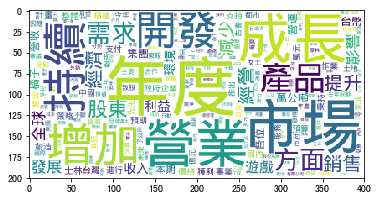

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"/Users/liangpeiru/Downloads/碩二/資本市場/wqy-microhei.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [22]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('年度', 180),
 ('市場', 150),
 ('成長', 127),
 ('營業', 117),
 ('增加', 91),
 ('持續', 88),
 ('開發', 88),
 ('產品', 82),
 ('方面', 81),
 ('需求', 75)]

In [23]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0x1a1ca9e4a8>,
 <a list of 10 Text xticklabel objects>)

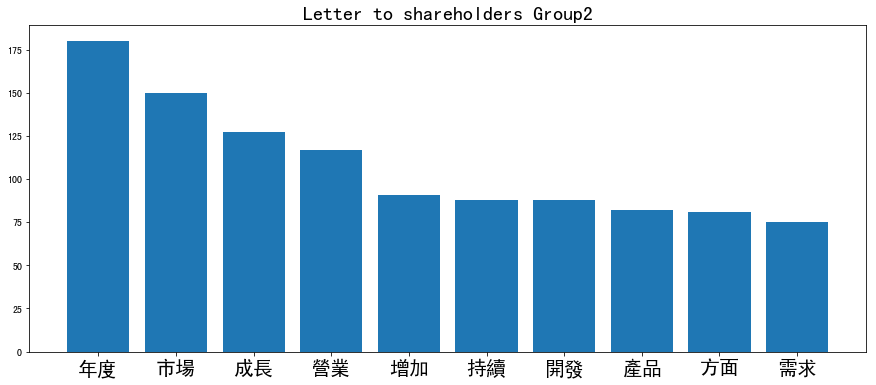

In [24]:
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.title("Letter to shareholders Group2",fontsize=20)
plt.xticks(range(0,10),label,fontsize=20)

In [25]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 0.56831869, -0.20173607],
       [ 0.54112865, -0.20170109],
       [-0.0729439 ,  0.51151229],
       [-0.12457281,  0.60480143],
       [ 0.07980213, -0.01944812],
       [ 0.03901087,  0.02128672],
       [-0.50005805, -0.3981645 ],
       [-0.50853639, -0.42392254],
       [-0.02629156,  0.00696671],
       [-0.010279  , -0.00869024],
       [-0.03158244,  0.01962632],
       [-0.06886119,  0.52180338],
       [ 0.04212484,  0.0139382 ],
       [-0.43322156, -0.37117683],
       [-0.05753115, -0.00828457],
       [-0.06190014,  0.04133435],
       [ 0.04303223,  0.00210727],
       [ 0.05141744, -0.01097121],
       [-0.45764998, -0.34999473],
       [-0.40629262, -0.31564162],
       [ 0.53835462, -0.20625347],
       [ 0.56062414, -0.20718517],
       [-0.12612306,  0.57611547],
       [-0.11353429,  0.62311487],
       [ 0.53556455, -0.21943685]])

No handles with labels found to put in legend.


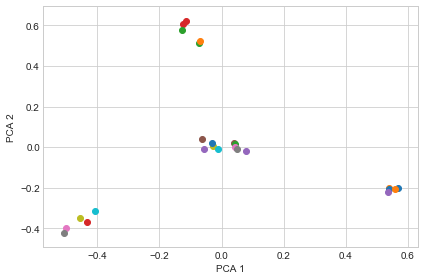

In [26]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

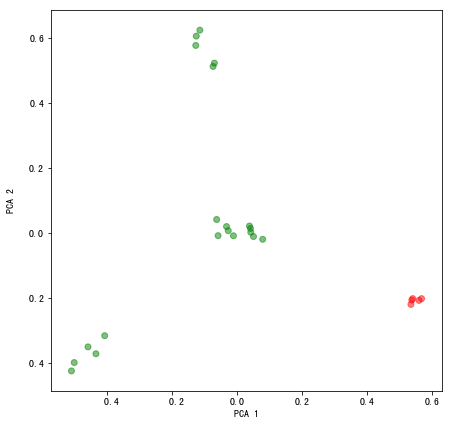

In [29]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()